## Data preprocessing

In [4]:
#!pip install pymupdf
#!pip install  beautifulsoup4 lxml
import os
from bs4 import BeautifulSoup # for html to text scrapping 
import fitz# part from pymupdf

import nltk
nltk.download("stopwords") # set of stop words 
nltk.download("punkt") # encoder of stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import string
# getting the list of puncation
ignore=string.punctuation
ignore=ignore.replace(".","")

import re



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiment\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiment\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
def removal_lowering_stopword(text):
    l=[]
    text_list=text.lower().split()
    for w in text_list:
        if w  not in stop_words:
            l.append(w)
    # convert into string again         
    text=" ".join(l)  
    return text


def remove_punc1(text):
    return text.translate(str.maketrans("","",ignore))

import re



def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Replace special dot characters and multiple dots with a single full stop
    text = re.sub(r'[\u2022●]', '.', text)  # Replaces specific bullet points with a full stop
    text = re.sub(r'\.{2,}', '.', text)  # Handles multiple dots

    # Remove any remaining unwanted characters except for periods
    text = re.sub(r'[^\w\s,.]', '', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Return the cleaned text
    return text





def read_n_combine(path):
    
    all_text=""
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        # for Pdf
        if os.path.isfile(file_path) and file.endswith(".pdf"):
            pdf_document=fitz.open(file_path)
            for page_num in range(len(pdf_document)):
                
                page = pdf_document[page_num]
                all_text=all_text +  clean_text(remove_punc1(removal_lowering_stopword(page.get_text())))+"\n"
            pdf_document.close()
        
        # for html    
        elif os.path.isfile(file_path) and file.endswith(".html"):
            file=open(file_path,"r",encoding="utf-8")
            html_content=file.read()
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(html_content, "lxml")
            # retrive text content from parse
            all_text=all_text + clean_text(remove_punc1(removal_lowering_stopword(soup.get_text())))+"\n"
            file.close()

        # for text 
        elif os.path.isfile(file_path) and file.endswith(".txt"):
            file= open(file_path, 'r',encoding="utf-8")
            all_text=all_text + clean_text(remove_punc1(removal_lowering_stopword(file.read()))) + "\n"
            file.close()    
    
    # file saving into text 
    output_path=os.path.join("text_data","all_part.txt")        
    all_part=open(output_path,"w",encoding="utf-8")
    all_part.write(all_text)
    all_part.close()
    return(output_path)


In [13]:
# file clean and convert into text 
file_path=read_n_combine("Raw_data")
file=open(file_path,"r",encoding="utf-8")
text=file.read()
file.close()

## Tokenization

In [57]:
import gensim
import nltk
import pandas as pd 
from nltk.tokenize import sent_tokenize

def tokenizer_format_word2vec(text):
    text=sent_tokenize(text)
    story=[]
    for i in range(len(text)):
        if text[i].endswith("."):
            a=text[i].rstrip(" .")
        story.append(a.split(" "))
    return story

In [58]:
tokennize_sen=tokenizer_format_word2vec(text)

In [59]:
tokennize_sen

[['\nibookroot',
  'october',
  '20',
  '2007',
  'fourier',
  'analysis\nibookroot',
  'october',
  '20',
  '2007',
  'princeton',
  'lectures',
  'analysis',
  'fourier',
  'analysis',
  'introduction',
  'ii',
  'complex',
  'analysis',
  'iii',
  'real',
  'analysis',
  'measure',
  'theory',
  'integration',
  'hilbert',
  'spaces\nibookroot',
  'october',
  '20',
  '2007',
  'princeton',
  'lectures',
  'analysis',
  'fourier',
  'analysis',
  'introduction',
  'elias',
  'm.',
  'stein',
  'rami',
  'shakarchi',
  'princeton',
  'university',
  'press',
  'princeton',
  'oxford\ncopyright',
  '2003',
  'princeton',
  'university',
  'press',
  'published',
  'princeton',
  'university',
  'press',
  '41',
  'william',
  'street',
  'princeton',
  'new',
  'jersey',
  '08540',
  'united',
  'kingdom',
  'princeton',
  'university',
  'press',
  '6',
  'oxford',
  'street',
  'woodstock',
  'oxfordshire',
  'ox20',
  '1tw',
  'rights',
  'reserved',
  'library',
  'congress',
  'c

In [62]:
from gensim.models import Word2Vec
# trained at skip-gram model
 #preparing their dataset window and target word 
skip_gram_math = Word2Vec(sentences=tokennize_sen, vector_size=100, window=5, min_count=1, sg=1)

In [63]:
# building the unique words
skip_gram_math.build_vocab(tokennize_sen)

In [64]:
# training the model
skip_gram_math.train(tokennize_sen, total_examples=skip_gram_math.corpus_count, epochs=skip_gram_math.epochs)

(1701447, 1969210)

In [65]:
skip_gram_math.save("skip_gram_math.model")
list1=skip_gram_math.wv.index_to_key

In [66]:
list1

['',
 '1',
 '0',
 'x',
 '2',
 'f',
 'b',
 'n',
 'y',
 'r',
 '3',
 'z',
 'v',
 'c',
 'function',
 'p',
 '4',
 'vector',
 'a',
 'w',
 'let',
 'fx',
 'linear',
 'u',
 'matrix',
 'example',
 'two',
 'x2',
 'g',
 'set',
 '5',
 't',
 'fourier',
 'theorem',
 'solution',
 'figure',
 '1.',
 'equation',
 'one',
 'l',
 'k',
 'vectors',
 'functions',
 'given',
 'series',
 'also',
 'see',
 'since',
 'number',
 'θ',
 'point',
 'space',
 'chapter',
 'consider',
 'x1',
 'data',
 'system',
 'a.',
 '6',
 'q',
 'product',
 'form',
 'using',
 'following',
 'section',
 'use',
 'equations',
 'called',
 'problem',
 'therefore',
 'variables',
 'option',
 'basis',
 'r2',
 'learning',
 '2.',
 'then',
 'proof',
 'case',
 'transform',
 'hence',
 '0.',
 '20',
 'value',
 'show',
 'dx',
 'i.e',
 'y2',
 'note',
 'integral',
 'xn',
 'thus',
 'n1',
 'machine',
 'π',
 'line',
 '8',
 '10',
 'r3',
 'find',
 'px',
 'points',
 '7',
 'model',
 '3.',
 'values',
 'graph',
 'h',
 'us',
 'may',
 'sin',
 'ﬁrst',
 'c.',
 'many',
 

In [76]:
skip_gram_math.wv["based"]

array([ 0.01376965, -0.28350723, -0.28794366,  0.09938385,  0.14507057,
       -0.59458345,  0.18165392,  0.42664   , -0.2695245 ,  0.06065315,
        0.24003017, -0.12203301,  0.19669117, -0.02235702, -0.0828112 ,
       -0.54745   ,  0.24806488, -0.51041096,  0.17580369, -0.47248188,
        0.48415497, -0.05138624,  0.78721106, -0.51931477,  0.31232455,
       -0.59678406, -0.33166197, -0.4428847 , -0.14999563,  0.5254254 ,
        0.38687155, -0.59495664,  0.7518475 , -0.45718455, -0.49897763,
        0.13475823, -0.57189935, -0.23385628,  0.01949641, -0.6271783 ,
       -0.25993696, -1.0342731 ,  0.1157253 ,  0.27670997,  0.39592078,
       -0.19498278,  0.42006803,  0.09274017, -0.07706328,  0.02100726,
        0.25192928, -0.2536234 , -0.22069055,  0.203521  , -0.21082531,
        0.2767163 ,  0.16834094,  0.1957567 ,  0.30101132,  0.39995933,
        0.08888581,  0.21480599, -0.09233547,  0.4255815 , -0.29813233,
        0.01430547, -0.04043746,  0.0700904 , -0.00273723, -0.22

In [77]:
# getting normalised matrix for pca analysis 
matrix=skip_gram_math.wv.get_normed_vectors()

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=3)

In [86]:
pca_math = pca.fit_transform(matrix)

In [87]:
pca_math

array([[ 0.24358362,  0.30024496, -0.35245043],
       [ 0.24131858, -0.42554778, -0.18776986],
       [ 0.23987122, -0.48781347, -0.0785793 ],
       ...,
       [ 0.02073964, -0.05493033,  0.03888046],
       [-0.17673375,  0.04877271, -0.08397126],
       [-0.17047334,  0.2772734 ,  0.14391953]], dtype=float32)

In [88]:
# plot in 3d
import pandas as pd


In [95]:
df_pca_math=pd.DataFrame(pca_math,index=list1)

In [97]:
df_pca_math.head(20)

,0,1,2
,0.243584,0.300245,-0.352450
1,0.241319,-0.425548,-0.187770
0,0.239871,-0.487813,-0.078579
x,0.276447,-0.508002,0.014740
2,0.178654,-0.437172,-0.100222
f,0.347807,-0.391695,-0.062033
b,0.260057,-0.319741,-0.049726
n,0.279109,-0.272133,-0.161595
y,0.261319,-0.481559,0.087251
r,0.388297,-0.304660,-0.243965


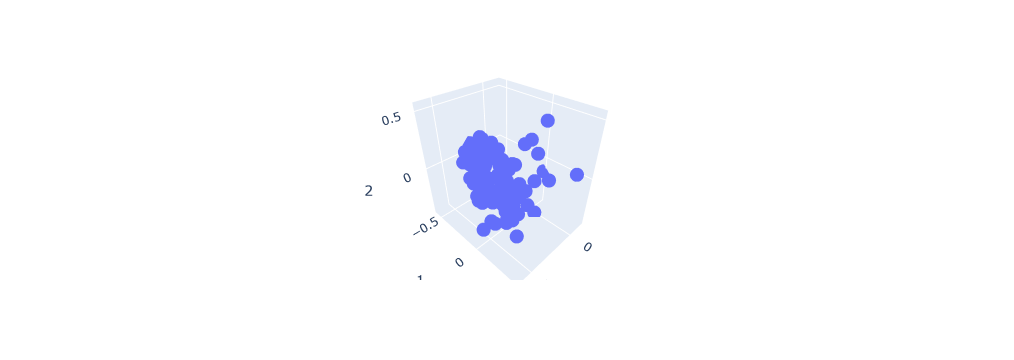

In [98]:
import plotly.express as px
fig = px.scatter_3d(df_pca_math[300:400],x=0,y=1,z=2)
fig.show()